In [116]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

In [22]:
paths = glob("./lluvia/2024*")

In [23]:
paths

['./lluvia\\202401010000Lluv.csv',
 './lluvia\\202402010000Lluv.csv',
 './lluvia\\202403010000Lluv.csv',
 './lluvia\\202404010000Lluv.csv',
 './lluvia\\202405010000Lluv.csv',
 './lluvia\\202406010000Lluv.csv',
 './lluvia\\202407010000Lluv.csv',
 './lluvia\\202408010000Lluv.csv',
 './lluvia\\202409010000Lluv.csv']

In [105]:
estaciones = [pd.read_csv(path,  encoding='latin-1', usecols=[3,4]) for path in paths]
estaciones = pd.concat(estaciones)
estaciones = list(estaciones.ESTACION.unique())
gro = [s for s in estaciones if "Gro" in s]

In [136]:
data = [pd.read_csv(path,  encoding='latin-1', usecols=[4,5], index_col=0) for path in paths]
data = pd.concat(data,axis=0)
data = data.loc[gro]
data = data.groupby(data.index).sum()
data["suma"] = data.sum(axis=1)
data.sort_values(by="suma", ascending=False, inplace=True)
data.head()

,ene-24,feb-24,mar-23,abr-24,may-24,jun-24,jul-24,sep-24,suma
ESTACION,,,,,,,,,
"Acapulco, Gro.",0.0,5.0,0.0,0.0,0.0,91.8,101.5,1748.6,1946.9
"Quetzala, Gro.",0.0,0.0,0.2,0.0,0.0,123.7,206.7,1356.2,1686.8
"Ometepec, Gro.",0.0,2.2,0.0,0.0,0.0,147.0,299.9,1187.8,1636.9
"Taxco, Gro.",3.4,15.8,0.0,0.0,11.0,233.4,592.9,674.9,1531.4
"El Ocotito, Gro.",0.0,0.0,0.0,0.0,2.0,193.0,388.8,926.5,1510.3


In [142]:
mayor_lluvia = data.index[:3]
mayor_lluvia

Index(['Acapulco, Gro.', 'Quetzala, Gro.', 'Ometepec, Gro.'], dtype='object', name='ESTACION')

## Todos los años

In [88]:
paths_todos = glob("./lluvia/*csv")

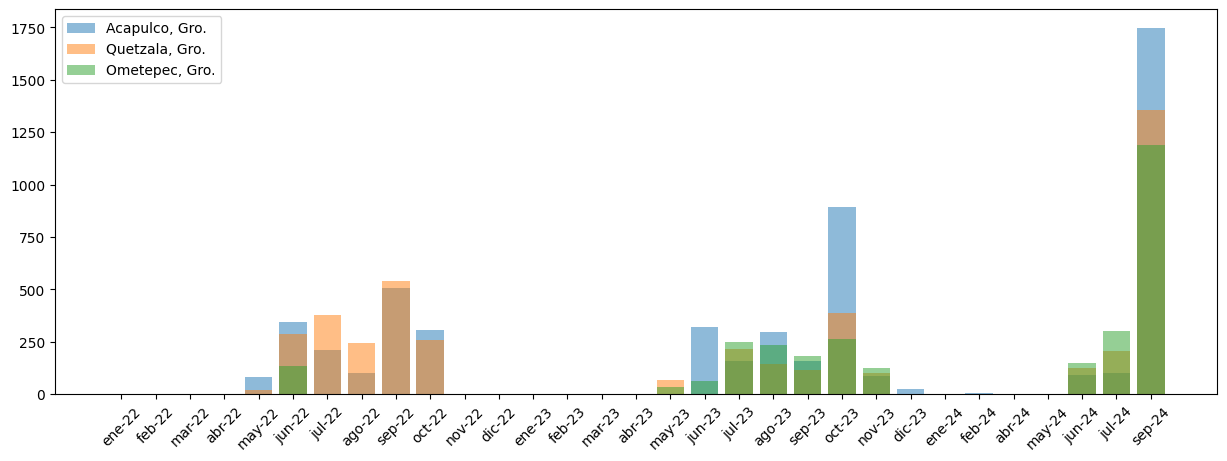

In [153]:
fig, ax = plt.subplots(figsize=(15,5))

for site in mayor_lluvia:
    data = [pd.read_csv(path,  encoding='latin-1', usecols=[4,5], index_col=0) for path in paths_todos]
    data = pd.concat(data,axis=0)
    data = data.loc[site]
    ax.bar(range(0,31,1),data.sum(axis=0), label=site, alpha=0.5)
    ax.set_xticks(range(0,31,1), data.columns, rotation=45);
    ax.legend()

In [154]:
data.head()

,ene-22,feb-22,mar-22,abr-22,may-22,jun-22,jul-22,ago-22,sep-22,oct-22,...,oct-23,nov-23,dic-23,ene-24,feb-24,abr-24,may-24,jun-24,jul-24,sep-24
"Ometepec, Gro.",NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Ometepec, Gro.",NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Ometepec, Gro.",NaN,NaN,NaN,NaN,NaN,133.7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Ometepec, Gro.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Ometepec, Gro.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
